In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
%matplotlib inline

In [2]:
data = pd.read_csv('/home/maxim/work/ml/hse-ml/auto-mpg.csv', sep = ',', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

# Описание датасета

**Данный датасет содержит данные о 398 автомобилях**

Для каждого автомобиля представлены такие поля, как:
* mpg (miles per gallon) - мили на галлон, величина, обратная расходу топлива
* cylinders - число цилиндров
* displacement - объём двигателя
* horsepower - мощность двигателя в лошадиных силах
* weight - масса автомобиля (в кг)
* acceleration - время разгона с места до 100 км/ч
* model year - год начала производства данной модели
* origin - место изготовления автомобиля
    * 1 - Северная Америка
    * 2 - Европа
    * 3 - Азия
* car name - название автомобиля


In [4]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [5]:
print(data.shape)
print(data.columns)

(398, 9)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [6]:
print(type(data['origin'][1]))
print(type(data['displacement'][1]))
print(type(data['horsepower'][1]))

<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'str'>


Величины mpg, displacement, acceleration имеют тип numpy.float64.
Величины cylinders, weight, model year, origin имеют тип numpy.int64.
Величины horsepower и car name имеют тип str
horsepower имеет тип str, т.к. в некоторых местах в этом столбце имеются пропуски, где вместо числа написан вопросительный знак

In [7]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Построим матрицы рассеяния. Наиболее отчетливо заметны зависимости: mpg и displacement, mpg и weight, displacement и weight, displacement и cylinders, weight и cylinders

/home/maxim/py3-env/lib/python3.4/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


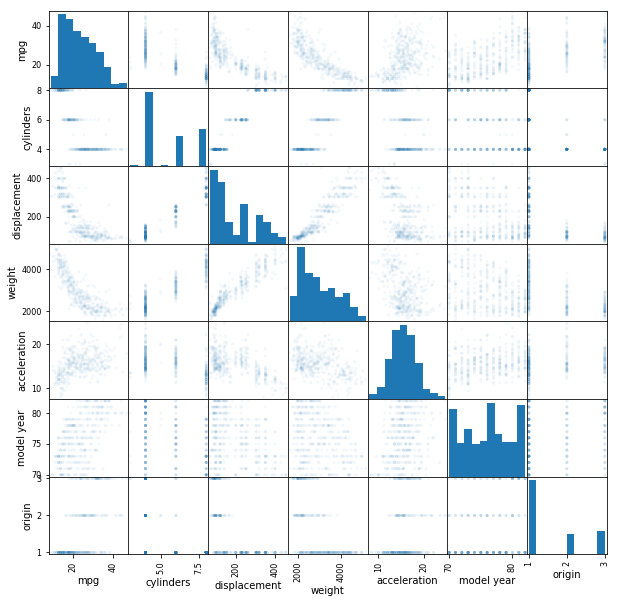

In [8]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (10, 10))
pass

Также посчитаем коэффициент корреляции для всех пар величин. Можно заметить те же зависимости

In [9]:
data.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


Построим несколько зависимостей крупнее

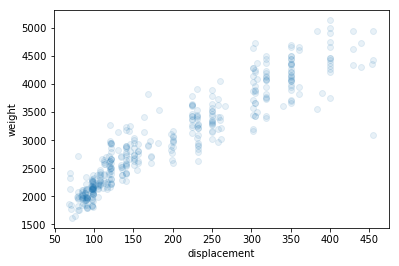

In [10]:
plt.plot(data['displacement'], data['weight'], 'o', alpha = 0.1)
plt.xlabel('displacement')
plt.ylabel('weight')
pass

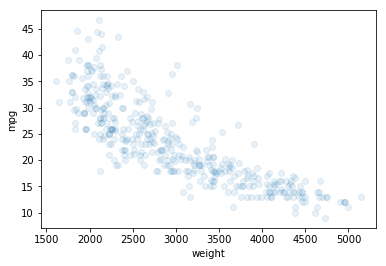

In [11]:
plt.plot(data['weight'], data['mpg'], 'o', alpha = 0.1)
plt.xlabel('weight')
plt.ylabel('mpg')
pass

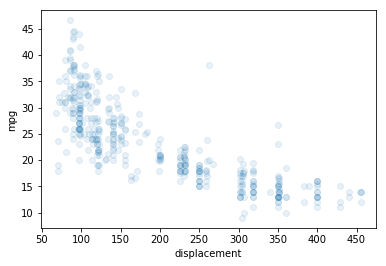

In [12]:
plt.plot(data['displacement'], data['mpg'], 'o', alpha = 0.1)
plt.xlabel('displacement')
plt.ylabel('mpg')
pass

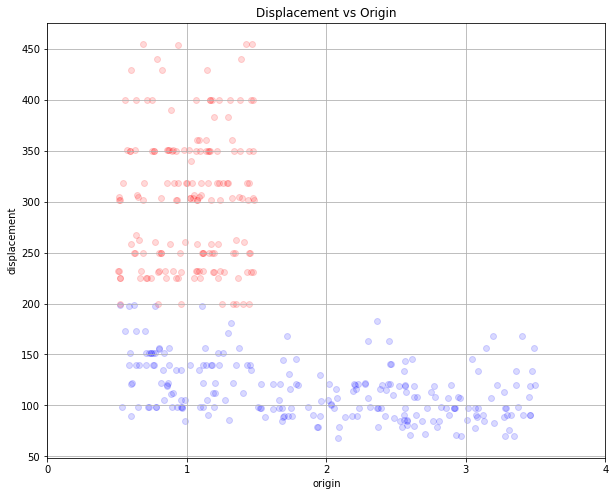

In [13]:
np.random.seed(0)
cylinders_rnd = data['origin'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(cylinders_rnd[data['displacement'] < 200],
            data[data['displacement'] < 200]['displacement'],
            alpha = 0.15,
            label = 'V < 200',
            color = 'b')


plt.scatter(cylinders_rnd[data['displacement'] >= 200],
            data[data['displacement'] >= 200]['displacement'],
            alpha = 0.15,
            label = 'V >= 200',
            color = 'r')

plt.xlabel('origin')
plt.xticks(range(10))
plt.xlim(0, 4)
plt.ylabel('displacement')
plt.title('Displacement vs Origin')
plt.grid()

Из данного графика можно видеть, что автомобили с большим объемом двигателя производятся в Северной Америке.
Красным показаны автомобили с объемом двигателя > 200 единиц, синим остальные.

In [14]:
data.describe(include = ['object'])

,horsepower,car name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


In [15]:
data.describe(include = ('all'))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


Приведем поле horsepower к типу **int**. Для этого воспользуемся функцией to_numeric из библиотеки **Pandas**. D случае невозможности привести поле к числовому типу при передаче параметра errors='coerce' поле будет равным NaN

In [16]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [17]:
Nan_count = 0
for tmp in data['horsepower']:
    if np.isnan(tmp):
        Nan_count += 1
print(Nan_count)

6


Так как пропущенных значений немного (6), то можно удалить строки с пропущенными значениями

In [18]:
data = data.dropna(axis = 0)

In [19]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Будем рассматривать поле origin как категориальный признак, а не численный. Сначала приведем его в строковому типу

In [20]:
data['origin'] = data['origin'].apply(str)

/home/maxim/py3-env/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [22]:
type(data['origin'][5])

str

Разделим признаки на численные и категориальные

In [23]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['origin', 'car name']
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']


Пользоваться названием автомобиля мы не будем, поэтому исключим из рассмотрения этот признак

In [24]:
data = data.drop('car name', axis = 1)

In [25]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['origin']
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']


In [26]:
for c in categorical_columns:
    print(c, data[c].unique())

origin ['1' '3' '2']


In [27]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['origin']


Так как **origin** не бинарный признак, то применим к нему метод _векторизации_

In [28]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['origin_1', 'origin_2', 'origin_3'], dtype='object')


In [29]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [30]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [31]:
data_numerical.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-3.064796e-16,-9.091367e-17,-5.209481e-17,-1.767294e-16,-2.084323e-17,6.226480e-15,-1.273641e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.850853e+00,-1.449152e+00,-1.208019e+00,-1.519034e+00,-1.606522e+00,-2.733490e+00,-1.623241e+00
25%,-8.258696e-01,-8.629108e-01,-8.544397e-01,-7.656144e-01,-8.857216e-01,-6.402369e-01,-8.088504e-01
50%,-8.916306e-02,-8.629108e-01,-4.148541e-01,-2.849846e-01,-2.049490e-01,-1.497955e-02,5.540071e-03
75%,7.116049e-01,1.482053e+00,7.772830e-01,5.593651e-01,7.501341e-01,5.377842e-01,8.199306e-01
max,2.966568e+00,1.482053e+00,2.490234e+00,3.261284e+00,2.545808e+00,3.355973e+00,1.634321e+00


In [32]:
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
print(data.shape)

(392, 10)


In [33]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,392.000000,392.000000,392.000000
mean,-3.064796e-16,-9.091367e-17,-5.209481e-17,-1.767294e-16,-2.084323e-17,6.226480e-15,-1.273641e-15,0.625000,0.173469,0.201531
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.484742,0.379136,0.401656
min,-1.850853e+00,-1.449152e+00,-1.208019e+00,-1.519034e+00,-1.606522e+00,-2.733490e+00,-1.623241e+00,0.000000,0.000000,0.000000
25%,-8.258696e-01,-8.629108e-01,-8.544397e-01,-7.656144e-01,-8.857216e-01,-6.402369e-01,-8.088504e-01,0.000000,0.000000,0.000000
50%,-8.916306e-02,-8.629108e-01,-4.148541e-01,-2.849846e-01,-2.049490e-01,-1.497955e-02,5.540071e-03,1.000000,0.000000,0.000000
75%,7.116049e-01,1.482053e+00,7.772830e-01,5.593651e-01,7.501341e-01,5.377842e-01,8.199306e-01,1.000000,0.000000,0.000000
max,2.966568e+00,1.482053e+00,2.490234e+00,3.261284e+00,2.545808e+00,3.355973e+00,1.634321e+00,1.000000,1.000000,1.000000


Так как мы будем предсказывать **mpg**, то исключим его из матрицы **X** и он будет представлять отдельный вектор **y**

In [4]:
X = data.drop(('mpg'), axis = 1)
y = data['mpg']
feature_names = X.columns

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

274 118


In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
#knn.set_params(n_neighbors=10)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
y_train_predict = lin_reg.predict(X_train)
y_test_predict = lin_reg.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

1.0 1.0


In [38]:
print(lin_reg.predict(X_train)[0:5])
print(y_train[0:5])

[ 0.86382963  0.66081523  1.69228013  0.24665436  0.04981437]
335    1.480342
397    0.967851
394    2.633448
29     0.455359
275   -0.825870
Name: mpg, dtype: float64


Так как большинство методов в нашем курсе применяются для классификации, то попробуем предсказывать место производства автомобиля **origin**. Заново загрузим данные, приведем **horsepower** к численному виду, выделим  **origin** в отдельный столбец

In [1]:
import pandas as pd
data = pd.read_csv('/home/maxim/work/ml/hse-ml/auto-mpg.csv', sep = ',', engine = 'python')

In [2]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [3]:
data = data.dropna(axis = 0)

In [4]:
data = data.drop('car name', axis = 1)

In [5]:
X = data.drop(('origin'), axis = 1)
y = data['origin']
feature_names = X.columns

Разделим датасет на тренировочную и тестовую выборки в соотношении 70/30, выбирать вершины будем в случайном порядке

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

274 118


In [45]:
X_train

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
335,35.0,4,122.0,88.0,2500,15.1,80
397,31.0,4,119.0,82.0,2720,19.4,82
394,44.0,4,97.0,52.0,2130,24.6,82
29,27.0,4,97.0,88.0,2130,14.5,71
275,17.0,6,163.0,125.0,3140,13.6,78
294,34.1,4,86.0,65.0,1975,15.2,79
86,14.0,8,304.0,150.0,3672,11.5,73
59,23.0,4,97.0,54.0,2254,23.5,72
359,28.1,4,141.0,80.0,3230,20.4,81
190,14.5,8,351.0,152.0,4215,12.8,76


## k nearest neighbors
Применим метод **kNN** с числом ближайших соседей = 1. Создаем и тренируем классификатор

In [23]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Точность на обучающей выборке

In [47]:
np.mean(model.predict(X_train) == y_train)

1.0

Точность на тестовой выборке

In [48]:
np.mean(model.predict(X_test) == y_test)

0.73728813559322037

Построим зависимость массы автомобиля от объема двигателя, цветом обозначим место производства автомобиля

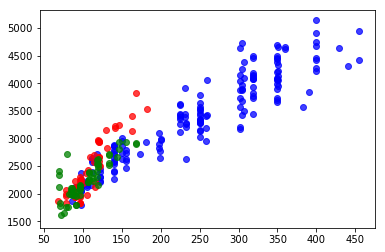

In [49]:
plt.scatter(X_train[y_train == 1]['displacement'], X_train[y_train == 1]['weight'], color = 'b', alpha = 0.75)
plt.scatter(X_train[y_train == 2]['displacement'], X_train[y_train == 2]['weight'], color = 'r', alpha = 0.75)
plt.scatter(X_train[y_train == 3]['displacement'], X_train[y_train == 3]['weight'], color = 'g', alpha = 0.75)

Будем брать различное число ближайших соседей и посмотрим на тестовую и тренировочную ошибки, которые мы будем получать

In [24]:
import sklearn as sk
kk = list(range(1, 119, 1))
err_train = []
err_test = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

Постром графики этих ошибок в зависимости от числа ближайших соседей

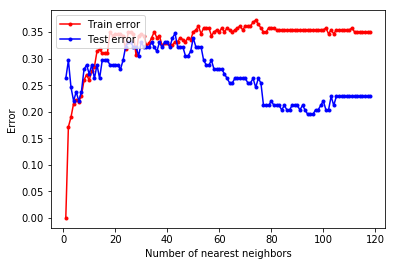

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error') 
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Error')
plt.legend(loc = 2)
pass

In [52]:
print(min(err_test))
print('число ближайших соседей, при котором тестовая ошибка минимальна - ', kk[np.argmin(err_test)])
print('число примеров тестовой выборке, у которых origin == 1 ', sum(y_test == 1))
print('число примеров тестовой выборке, у которых origin == 2 ', sum(y_test == 2))
print('число примеров тестовой выборке, у которых origin == 3 ', sum(y_test == 3))

0.194915254237
число ближайших соседей, при котором тестовая ошибка минимальна -  94
число примеров тестовой выборке, у которых origin == 1  78
число примеров тестовой выборке, у которых origin == 2  16
число примеров тестовой выборке, у которых origin == 3  24


Можно видеть, что выборка не сбалансирована и число примеров из первого класса гораздо больше, чем из второго и  из третьего

Поэтому получается, что ошибка получается меньше, если игнорировать второй класс и более или менее правильно предсказывать первый и третий классы

In [53]:
model = neighbors.KNeighborsClassifier(n_neighbors = kk[np.argmin(err_test)])
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(sk.metrics.confusion_matrix(y_test, y_test_pred))
y_train_pred = model.predict(X_train)
print(sk.metrics.confusion_matrix(y_train, y_train_pred))

[[75  0  3]
 [ 6  0 10]
 [ 4  0 20]]
[[145   0  22]
 [ 25   0  27]
 [ 23   0  32]]


Стоило брать число ближайших соседей равным 4 или 6, при этих значениях достигается локальный минимум функции ошибки. В данном случае многие примеры из второго и третьего классов классифицируются правильно.

In [54]:
model = neighbors.KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(sk.metrics.confusion_matrix(y_test, y_test_pred))
y_train_pred = model.predict(X_train)
print(sk.metrics.confusion_matrix(y_train, y_train_pred))
print(err_test[4])

[[72  4  2]
 [ 6  9  1]
 [ 6  7 11]]
[[159   4   4]
 [ 14  31   7]
 [ 21   9  25]]
0.237288135593


Воспользуемся кросс-валидацией для kNN при NN = 1

In [25]:
from sklearn import cross_validation
model = neighbors.KNeighborsClassifier(n_neighbors = 1)
scores = cross_validation.cross_val_score(model, X, y, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Error:    %0.2f (+/- %0.2f)" % (1 - scores.mean(), scores.std() * 2))

[ 0.725       0.725       0.75        0.675       0.75        0.79487179
  0.64102564  0.71794872  0.55263158  0.56756757]
Accuracy: 0.69 (+/- 0.15)
Error:    0.31 (+/- 0.15)


Рассмотрим различное число ближайших соседей и посмотрим на зависимость ошибки при использовании кросс-валидации

In [56]:
kk = list(range(1, 119))
err_cv = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X, y)
    scores = cross_validation.cross_val_score(model, X, y, cv = 10)
    err_cv.append(1 - scores.mean())

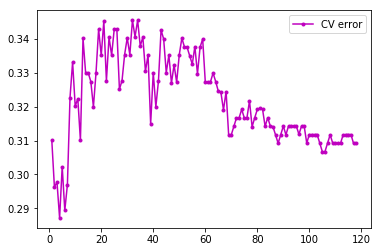

In [57]:
plt.plot(kk, err_cv, '.-m', label = 'CV error')
plt.legend(loc = 'best')

Видны минимумы при NN = 4 и NN = 6

## NB
Воспользуемся наивным байесовым классификатором (Гаусс)

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB(priors=None)

Тренировочная, тестовая и ошибка кросс-валидации

In [59]:
err_train = np.mean(y_train != gnb_model.predict(X_train))
err_test = np.mean(y_test != gnb_model.predict(X_test))
print(err_train, err_test)
scores = cross_validation.cross_val_score(gnb_model, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.343065693431 0.245762711864
Accuracy: 0.67 (+/- 0.26)


In [60]:
CF = sk.metrics.confusion_matrix(y_train, gnb_model.predict(X_train))
print(CF)
CF = sk.metrics.confusion_matrix(y_test, gnb_model.predict(X_test))
print(CF)

[[113  25  29]
 [  4  28  20]
 [  5  11  39]]
[[63  3 12]
 [ 1  6  9]
 [ 1  3 20]]


В данном случае меньшее количество примеров из первого класса классифицировано правильно

Воспользуемся наивным байесовым классификатором (Бернулли)

In [61]:
from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Тренировочная и тестовая ошибки

In [62]:
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))
scores = cross_validation.cross_val_score(gnb_model, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.390510948905
0.338983050847
Accuracy: 0.67 (+/- 0.26)


In [63]:
CF = sk.metrics.confusion_matrix(y_train, y_train_pred)
print(CF)
CF = sk.metrics.confusion_matrix(y_test, y_test_pred)
print(CF)

[[167   0   0]
 [ 52   0   0]
 [ 55   0   0]]
[[78  0  0]
 [16  0  0]
 [24  0  0]]


Все примеры отнесены к первому классу

Воспользуемся наивным байесовым классификатором (Мультиномиальный)

In [64]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Тренировочная и тестовая ошибки

In [65]:
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))
scores = cross_validation.cross_val_score(nb_model, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.357664233577
0.228813559322
Accuracy: 0.67 (+/- 0.32)


In [66]:
CF = sk.metrics.confusion_matrix(y_train, y_train_pred)
print(CF)
CF = sk.metrics.confusion_matrix(y_test, y_test_pred)
print(CF)

[[113  31  23]
 [  1  26  25]
 [  2  16  37]]
[[63  8  7]
 [ 0  8  8]
 [ 1  3 20]]


## Support Vector Machine

**Линейное ядро**

In [64]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

In [68]:
y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))
scores = cross_validation.cross_val_score(svc_model, X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.259124087591
0.177966101695
Accuracy: 0.74 (+/- 0.15)


Попробуем получить лучшие результаты изменяя параметр гамма

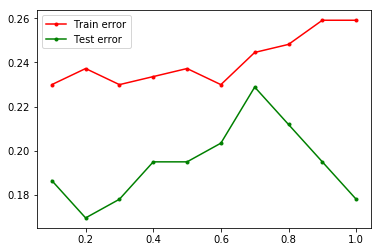

In [70]:
gamma = [i/10 for i in range(1, 11)]

err_train = []
err_test = []
for temp in gamma:
    svc_model = SVC(kernel = 'linear', C = temp).fit(X_train, y_train)
    y_train_pred = svc_model.predict(X_train)
    y_test_pred = svc_model.predict(X_test)
    err_train.append(np.mean(y_train_pred != y_train))
    err_test.append(np.mean(y_test_pred != y_test))
plt.plot(gamma, err_train, '.-r', label = 'Train error')
plt.plot(gamma, err_test, '.-g', label = 'Test error')
plt.legend(loc = 'best')

Видно, что минимум тестовой ошибки достигается в промежутке (0.1, 0.3)

Найдем чуть более точную оценку параметра, при котором достигается минимум

In [16]:
gamma = np.linspace(1.25, 3.0, 10)

err_train = []
err_test = []
for temp in gamma:
    svc_model = SVC(kernel = 'linear', C = temp).fit(X_train, y_train)
    y_train_pred = svc_model.predict(X_train)
    y_test_pred = svc_model.predict(X_test)
    err_train.append(np.mean(y_train_pred != y_train))
    err_test.append(np.mean(y_test_pred != y_test))

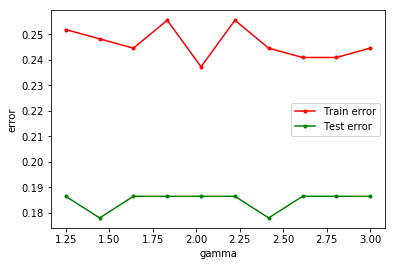

In [17]:
plt.xlabel('gamma')
plt.ylabel('error')
plt.plot(gamma, err_train, '.-r', label = 'Train error')
plt.plot(gamma, err_test, '.-g', label = 'Test error')
plt.legend(loc = 'best')

In [18]:
index_of_min = err_test.index(min(err_test))
svc_model = SVC(kernel = 'linear', C = gamma[index_of_min]).fit(X_train, y_train)
y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

Минимум ошибки на тестовой выборке достигается при $\gamma \approx 1.4$

Ошибки на обучающей и на тестовой выборках

In [19]:
print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))

0.248175182482
0.177966101695


В итоге после подбора параметров тренировочная ошибка уменьшилась на 1%, а тестовая осталась прежней

In [75]:
CF = sk.metrics.confusion_matrix(y_train, y_train_pred)
print(CF)
CF = sk.metrics.confusion_matrix(y_test, y_test_pred)
print(CF)

[[142   8  17]
 [  6  32  14]
 [ 10  16  29]]
[[74  2  2]
 [ 1  8  7]
 [ 0  9 15]]


**Радиальное ядро**

In [20]:
svc_model = SVC(kernel = 'rbf').fit(X_train, y_train)

In [26]:
y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))
scores = cross_validation.cross_val_score(svc_model, X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.0
0.330508474576
Accuracy: 0.63 (+/- 0.01)


Можно видеть, что происходит переобучение, поэтому стоит поменять параметры модели

In [78]:
CF = sk.metrics.confusion_matrix(y_train, y_train_pred)
print(CF)
CF = sk.metrics.confusion_matrix(y_test, y_test_pred)
print(CF)

[[167   0   0]
 [  0  52   0]
 [  0   0  55]]
[[78  0  0]
 [16  0  0]
 [23  0  1]]


Будем изменять параметр гамма и найдем такой, при котором ошибка на тестовом датасете будет минимальна.
Правда в таком случае он у нас уже валидационный, а не тестовый.

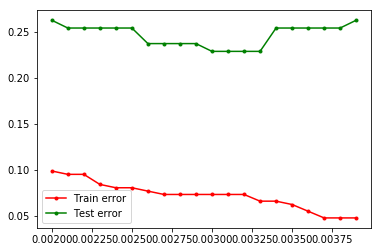

In [27]:
gamma = [i/10000 for i in range(20, 40)]

err_train = []
err_test = []
for temp in gamma:
    svc_model = SVC(kernel = 'rbf', gamma = temp).fit(X_train, y_train)
    y_train_pred = svc_model.predict(X_train)
    y_test_pred = svc_model.predict(X_test)
    err_train.append(np.mean(y_train_pred != y_train))
    err_test.append(np.mean(y_test_pred != y_test))
plt.plot(gamma, err_train, '.-r', label = 'Train error')
plt.plot(gamma, err_test, '.-g', label = 'Test error')
plt.legend(loc = 'best')

In [29]:
index_of_min = err_test.index(min(err_test))
print(gamma[index_of_min])
svc_model = SVC(kernel = 'rbf', gamma = gamma[index_of_min]).fit(X_train, y_train)
y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

0.003


Таким образом, тестовая ошибка минимальна при $\gamma \approx 0.003$

Ошибки на обучающей и на тестовой выборках

In [ ]:
y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))
scores = cross_validation.cross_val_score(svc_model, X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.21897810219
0.228813559322


**Сигмоидальное ядро**

In [15]:
svc_model = SVC(kernel = 'sigmoid', gamma = 0.5).fit(X_train, y_train)

In [18]:
y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))
scores = cross_validation.cross_val_score(svc_model, X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.390510948905
0.338983050847
Accuracy: 0.63 (+/- 0.01)


Были попытки проделать ту же самую процедуру для сигмоидального ядра, но, к сожалению, они не дали результатов

[[167   0   0]
 [ 52   0   0]
 [ 55   0   0]]
[[78  0  0]
 [16  0  0]
 [24  0  0]]


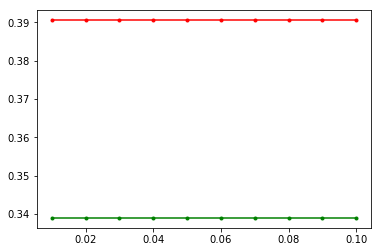

In [92]:
gamma = [i/100 for i in range(1, 11)]
C = [i/100 for i in range(1, 11)]

err_train = []
err_test = []
for temp in gamma:
    svc_model = SVC(kernel = 'sigmoid', gamma = temp, coef0 = -10).fit(X_train, y_train)
    y_train_pred = svc_model.predict(X_train)
    y_test_pred = svc_model.predict(X_test)
    err_train.append(np.mean(y_train_pred != y_train))
    err_test.append(np.mean(y_test_pred != y_test))
plt.plot(gamma, err_train, '.-r', label = 'Train error')
plt.plot(gamma, err_test, '.-g', label = 'Test error')

# from sklearn.model_selection import GridSearchCV
# parameters = {'C': C, 'gamma': gamma, 'kernel': ('sigmoid',)}
# svc = SVC()
# clf = GridSearchCV(svc, parameters, n_jobs = 2)
# svc_model = clf.fit(X_train, y_train)
# y_train_pred = svc_model.predict(X_train)
# y_test_pred = svc_model.predict(X_test)

# print(np.mean(y_train_pred != y_train))
# print(np.mean(y_test_pred != y_test))
CF = sk.metrics.confusion_matrix(y_train, y_train_pred)
print(CF)
CF = sk.metrics.confusion_matrix(y_test, y_test_pred)
print(CF)

In [105]:
y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))

0.390510948905
0.338983050847


Полиномиальное ядро

Очень долго обучалась

In [65]:
svc_model = SVC(kernel = 'poly', degree = 2).fit(X_train, y_train)

## Логистическая регрессия

In [8]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
from sklearn import cross_validation
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))
scores = cross_validation.cross_val_score(logistic_model, X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.233576642336
0.186440677966
Accuracy: 0.76 (+/- 0.14)


/home/maxim/py3-env/lib/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Сразу дает неплохой результат

Попробуем также поменять метрику с L2 на L1

In [104]:
logistic_model = LogisticRegression(penalty='l1')
logistic_model.fit(X_train, y_train)
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))

0.237226277372
0.186440677966


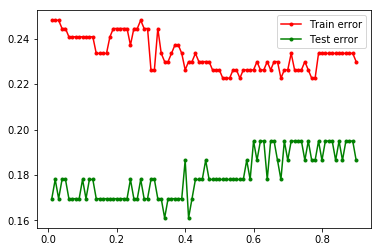

In [11]:
C = [i/100 for i in range(1, 91)]

err_train = []
err_test = []
for temp in C:
    logistic_model = LogisticRegression(C = temp).fit(X_train, y_train)
    y_train_pred = logistic_model.predict(X_train)
    y_test_pred = logistic_model.predict(X_test)
    err_train.append(np.mean(y_train_pred != y_train))
    err_test.append(np.mean(y_test_pred != y_test))
plt.plot(C, err_train, '.-r', label = 'Train error')
plt.plot(C, err_test, '.-g', label = 'Test error')
plt.legend(loc='best')
# logistic_model = LogisticRegression(penalty='l1')
# logistic_model.fit(X_train, y_train)
# y_train_pred = logistic_model.predict(X_train)
# y_test_pred = logistic_model.predict(X_test)

# print(np.mean(y_train_pred != y_train))
# print(np.mean(y_test_pred != y_test))

In [112]:
index_of_min = err_test.index(min(err_test))
logistic_model = LogisticRegression(C = C[index_of_min]).fit(X_train, y_train)
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))

0.229927007299
0.161016949153


In [114]:
CF = sk.metrics.confusion_matrix(y_train, y_train_pred)
print(CF)
CF = sk.metrics.confusion_matrix(y_test, y_test_pred)
print(CF)

[[148   8  11]
 [  6  27  19]
 [ 14   5  36]]
[[74  1  3]
 [ 3  6  7]
 [ 2  3 19]]


## Линейный дискриминантный анализ

In [12]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [13]:
y_train_pred = lda_model.predict(X_train)
y_test_pred = lda_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))

0.266423357664
0.194915254237


In [14]:
CF = sk.metrics.confusion_matrix(y_train, y_train_pred)
print(CF)
CF = sk.metrics.confusion_matrix(y_test, y_test_pred)
print(CF)

[[142   8  17]
 [ 10  26  16]
 [  5  17  33]]
[[70  1  7]
 [ 1  8  7]
 [ 1  6 17]]


## Квадратичный дискриминантный анализ

In [15]:
scores = cross_validation.cross_val_score(lda_model, X, y, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Error:    %0.2f (+/- %0.2f)" % (1 - scores.mean(), scores.std() * 2))

[ 0.725       0.725       0.75        0.85        0.8         0.74358974
  0.71794872  0.76923077  0.5         0.54054054]
Accuracy: 0.71 (+/- 0.21)
Error:    0.29 (+/- 0.21)


In [16]:
qda_model = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [19]:
y_train_pred = qda_model.predict(X_train)
y_test_pred = qda_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))

0.189781021898
0.194915254237


In [17]:
scores = cross_validation.cross_val_score(qda_model, X, y, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Error:    %0.2f (+/- %0.2f)" % (1 - scores.mean(), scores.std() * 2))

[ 0.875       0.85        0.85        0.75        0.85        0.82051282
  0.61538462  0.82051282  0.60526316  0.64864865]
Accuracy: 0.77 (+/- 0.20)
Error:    0.23 (+/- 0.20)


In [20]:
CF = sk.metrics.confusion_matrix(y_train, y_train_pred)
print(CF)
CF = sk.metrics.confusion_matrix(y_test, y_test_pred)
print(CF)

[[141   8  18]
 [  1  35  16]
 [  2   7  46]]
[[70  2  6]
 [ 3  5  8]
 [ 1  3 20]]


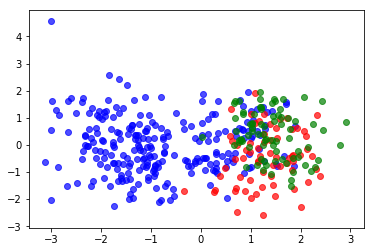

In [23]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 2)
lda_model.fit(X, y)
X_lda = lda_model.transform(X)

plt.scatter(X_lda[y == 1, 0], X_lda[y == 1, 1], color = 'b', label = 'America', alpha = 0.7)
plt.scatter(X_lda[y == 2, 0], X_lda[y == 2, 1], color = 'r', label = "Europe", alpha = 0.7)
plt.scatter(X_lda[y == 3, 0], X_lda[y == 3, 1], color = 'g', label = "Asia", alpha = 0.7)

Видим, что объектам нашей выборки далеко до линейной разделимости

## Random forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = sk.ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))

0.0
0.152542372881


In [10]:
CF = sk.metrics.confusion_matrix(y_train, y_train_pred)
print(CF)
CF = sk.metrics.confusion_matrix(y_test, y_test_pred)
print(CF)

[[172   0   0]
 [  0  46   0]
 [  0   0  56]]
[[68  3  2]
 [ 5 13  4]
 [ 4  0 19]]


## Feature importances

In [11]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'displacement' (0.2874)
 2. feature 'weight' (0.1833)
 3. feature 'mpg  ' (0.1482)
 4. feature 'horsepower' (0.1450)
 5. feature 'acceleration' (0.1046)
 6. feature 'model year' (0.0663)
 7. feature 'cylinders' (0.0652)


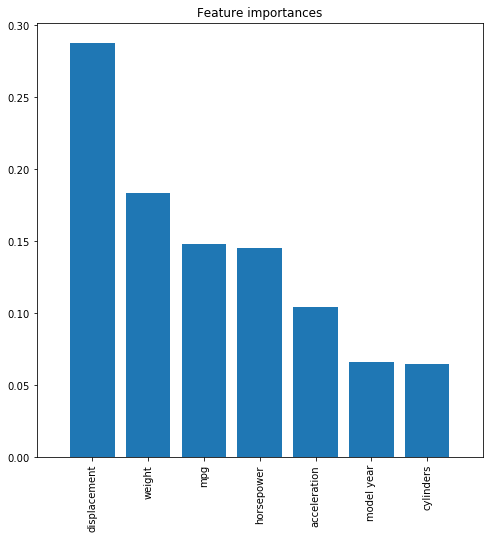

In [12]:
d_first = 7
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

Наиболее важный признак -  **объем двигателя**

In [16]:
n_estimators = [10 * i for i in range(1,30)]

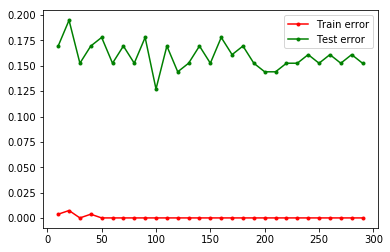

In [17]:
err_train = []
err_test = []
for temp in n_estimators:
    rf = sk.ensemble.RandomForestClassifier(n_estimators=temp).fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    err_train.append(np.mean(y_train_pred != y_train))
    err_test.append(np.mean(y_test_pred != y_test))
plt.plot(n_estimators, err_train, '.-r', label = 'Train error')
plt.plot(n_estimators, err_test, '.-g', label = 'Test error')
plt.legend(loc='best')

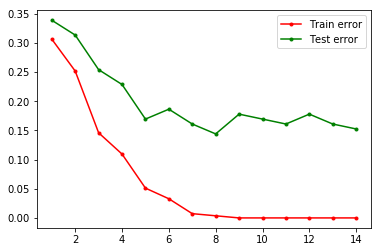

In [15]:
max_depths = [i for i in range(1,15)]
err_train = []
err_test = []
for temp in max_depths:
    rf = sk.ensemble.RandomForestClassifier(n_estimators=80, max_depth=temp).fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    err_train.append(np.mean(y_train_pred != y_train))
    err_test.append(np.mean(y_test_pred != y_test))
plt.plot(max_depths, err_train, '.-r', label = 'Train error')
plt.plot(max_depths, err_test, '.-g', label = 'Test error')
plt.legend(loc='best')

In [19]:
from sklearn import cross_validation
err_cv = []
for temp in n_estimators:
    rf = sk.ensemble.RandomForestClassifier(n_estimators=temp).fit(X_train, y_train)
    scores = cross_validation.cross_val_score(rf, X, y, cv = 10)
    err_cv.append(1 - scores.mean())

/home/maxim/py3-env/lib/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


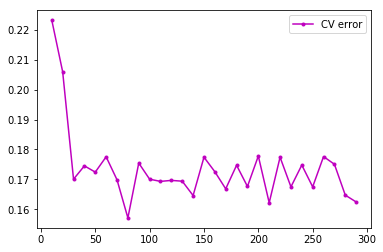

In [20]:
plt.plot(n_estimators, err_cv, '.-m', label = 'CV error')
plt.legend(loc = 'best')

## AdaBoost

In [45]:
ada = sk.ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [50]:
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))

0.116788321168
0.194915254237


In [51]:
CF = sk.metrics.confusion_matrix(y_train, y_train_pred)
print(CF)
CF = sk.metrics.confusion_matrix(y_test, y_test_pred)
print(CF)

[[163   3   1]
 [  8  41   3]
 [ 12   5  38]]
[[74  4  0]
 [ 5  8  3]
 [ 7  4 13]]


In [56]:
n_estimators = [10 * i for i in range(1,20)]

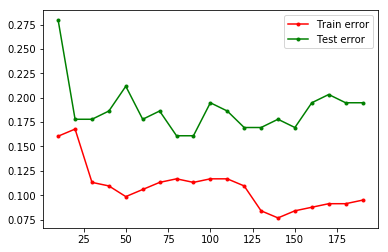

In [57]:
err_train = []
err_test = []
for temp in n_estimators:
    ada = sk.ensemble.AdaBoostClassifier(n_estimators = temp).fit(X_train, y_train)
    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)
    err_train.append(np.mean(y_train_pred != y_train))
    err_test.append(np.mean(y_test_pred != y_test))
plt.plot(n_estimators, err_train, '.-r', label = 'Train error')
plt.plot(n_estimators, err_test, '.-g', label = 'Test error')
plt.legend(loc='best')

In [61]:
err_cv = []
for temp in n_estimators:
    ada = sk.ensemble.AdaBoostClassifier(n_estimators=temp).fit(X_train, y_train)
    scores = cross_validation.cross_val_score(ada, X, y, cv = 10)
    err_cv.append(1 - scores.mean())

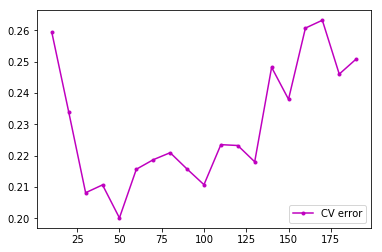

In [62]:
plt.plot(n_estimators, err_cv, '.-m', label = 'CV error')
plt.legend(loc = 'best')

По результатам проведенных экспериментов лучшие результаты показал Random Forest: $Best\:test\:error \approx 0.11$

Не зря ансамбли деревьев решений так популярны в настоящее время в машинном обучении

AdaBoost, к сожалению, не показал себя так хорошо: $Best\:test\:error \approx 0.17$

Также с помощью логистической регрессии "из коробки" получили $Test\:error \approx 0.185$, путем подбора регуляризации достигли $Best\:test\:error \approx 0.164$

SVM способна показать хорошие результаты, но необходим тщательный подбор параметров: модель с полиномиальным ядром тренировалась очень долго, модель с сигмоидальным ядром классифицирует все объекты как первый класс, не помог даже подбор параметров, модель с радиальным ядром поступала аналогично, но помог подбор параметров, получили  $Best\:test\:error \approx 0.23$ и только линейное ядро сразу дало нам ошибку $Test\:error\approx 0.178$

Линейный и квадратичный дискриминантный анализ дают нам $Best\:test\:error \approx 0.195$

Метод K ближайших соседей во всех вариантах имеет $Test\:error > 0.2$


Тестовая ошибка в том случае, если мы относим все объекты к первому классу  $Test\:error \approx 0.34$

# Extreme random trees

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
etc = sk.ensemble.ExtraTreesClassifier(n_estimators = 100)
etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))

0.0
0.127118644068


In [21]:
CF = sk.metrics.confusion_matrix(y_train, y_train_pred)
print(CF)
CF = sk.metrics.confusion_matrix(y_test, y_test_pred)
print(CF)

[[167   0   0]
 [  0  52   0]
 [  0   0  55]]
[[75  0  3]
 [ 1 11  4]
 [ 4  3 17]]


In [18]:
n_estimators = [10 * i for i in range(1,20)]

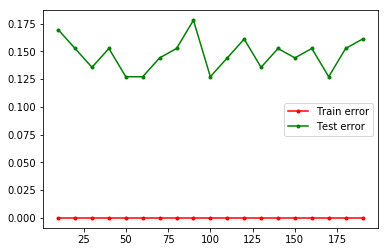

In [23]:
err_train = []
err_test = []
for temp in n_estimators:
    etc = sk.ensemble.ExtraTreesClassifier(n_estimators = temp).fit(X_train, y_train)
    y_train_pred = etc.predict(X_train)
    y_test_pred = etc.predict(X_test)
    err_train.append(np.mean(y_train_pred != y_train))
    err_test.append(np.mean(y_test_pred != y_test))
plt.plot(n_estimators, err_train, '.-r', label = 'Train error')
plt.plot(n_estimators, err_test, '.-g', label = 'Test error')
plt.legend(loc='best')

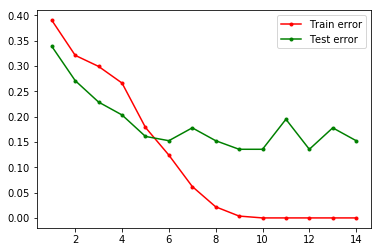

In [45]:
max_depths = [i for i in range(1,15)]
err_train = []
err_test = []
for temp in max_depths:
    etc = sk.ensemble.ExtraTreesClassifier(n_estimators = 80, max_depth=temp).fit(X_train, y_train)
    y_train_pred = etc.predict(X_train)
    y_test_pred = etc.predict(X_test)
    err_train.append(np.mean(y_train_pred != y_train))
    err_test.append(np.mean(y_test_pred != y_test))
plt.plot(max_depths, err_train, '.-r', label = 'Train error')
plt.plot(max_depths, err_test, '.-g', label = 'Test error')
plt.legend(loc='best')

In [25]:
from sklearn import cross_validation
err_cv = []
for temp in n_estimators:
    etc = sk.ensemble.ExtraTreesClassifier(n_estimators=temp).fit(X_train, y_train)
    scores = cross_validation.cross_val_score(etc, X, y, cv = 10)
    err_cv.append(1 - scores.mean())

/home/maxim/py3-env/lib/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


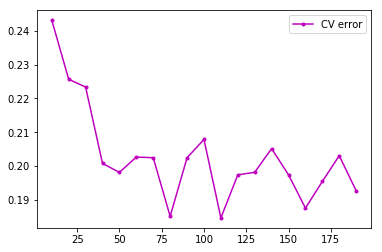

In [26]:
plt.plot(n_estimators, err_cv, '.-m', label = 'CV error')
plt.legend(loc = 'best')

# Graident boosting trees

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = sk.ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [11]:
y_train_pred = gbt.predict(X_train)
y_test_pred = gbt.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))

0.0
0.169491525424


In [12]:
CF = sk.metrics.confusion_matrix(y_train, y_train_pred)
print(CF)
CF = sk.metrics.confusion_matrix(y_test, y_test_pred)
print(CF)

[[172   0   0]
 [  0  46   0]
 [  0   0  56]]
[[66  6  1]
 [ 6 12  4]
 [ 2  1 20]]


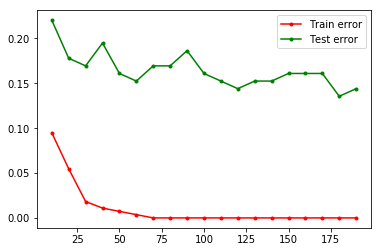

In [14]:
n_estimators = [10 * i for i in range(1,20)]
err_train = []
err_test = []
for temp in n_estimators:
    gbt = sk.ensemble.GradientBoostingClassifier(n_estimators = temp).fit(X_train, y_train)
    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    err_train.append(np.mean(y_train_pred != y_train))
    err_test.append(np.mean(y_test_pred != y_test))
plt.plot(n_estimators, err_train, '.-r', label = 'Train error')
plt.plot(n_estimators, err_test, '.-g', label = 'Test error')
plt.legend(loc='best')

In [33]:
from sklearn import cross_validation
err_cv = []
for temp in n_estimators:
    gbt = sk.ensemble.GradientBoostingClassifier(n_estimators=temp)
    scores = cross_validation.cross_val_score(gbt, X, y, cv = 10)
    err_cv.append(1 - scores.mean())

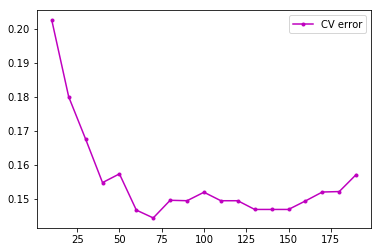

In [34]:
plt.plot(n_estimators, err_cv, '.-m', label = 'CV error')
plt.legend(loc = 'best')

In [17]:
max_depths = [i for i in range(1,8)]

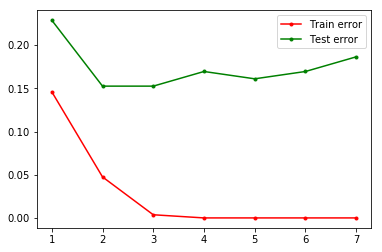

In [18]:
err_train = []
err_test = []
for temp in max_depths:
    gbt = sk.ensemble.GradientBoostingClassifier(n_estimators = 60, max_depth=temp).fit(X_train, y_train)
    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    err_train.append(np.mean(y_train_pred != y_train))
    err_test.append(np.mean(y_test_pred != y_test))
plt.plot(max_depths, err_train, '.-r', label = 'Train error')
plt.plot(max_depths, err_test, '.-g', label = 'Test error')
plt.legend(loc='best')

# PCA

Principal component analysis, метод главных компонент служит для уменьшения размерности пространства признаков

In [55]:
from sklearn import decomposition
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit

pca_train_errors, pca_test_errors, pca_cv_errors = [], [], []
n_components_range = range(1, 7)

for n_components in n_components_range:
    pca = decomposition.PCA(n_components)
    pca.fit(X)
    X_after_pca = pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_after_pca, y, test_size=0.3, random_state=11)
    gbt = sk.ensemble.GradientBoostingClassifier(n_estimators=70).fit(X_train, y_train)
    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)

    train_error = np.mean(y_train_pred != y_train)
    test_error = np.mean(y_test_pred != y_test)
    pca_train_errors.append(train_error)
    pca_test_errors.append(test_error)
    
    cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=11)
    scores = cross_val_score(gbt, X_after_pca, y, cv=cv, scoring='accuracy')
    pca_cv_errors.append(1 - scores.mean())

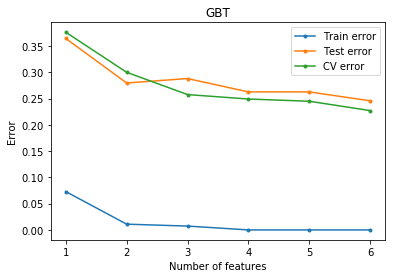

In [56]:
plt.plot(n_components_range, pca_train_errors, '.-', label='Train error')
plt.plot(n_components_range, pca_test_errors, '.-', label='Test error')
plt.plot(n_components_range, pca_cv_errors, '.-', label='CV error')
plt.title('GBT')
plt.xlabel('Number of features')
plt.ylabel('Error')
plt.legend();
plt.show()